**Support Vector Machine (SVM) Analysis on Iris and Digits Datasets**

This project demonstrates the effectiveness of SVM in classifying data of varying complexity and dimensionality. The comparison across different kernel functions highlights how kernel choice impacts decision boundaries, model performance, and computational complexity.

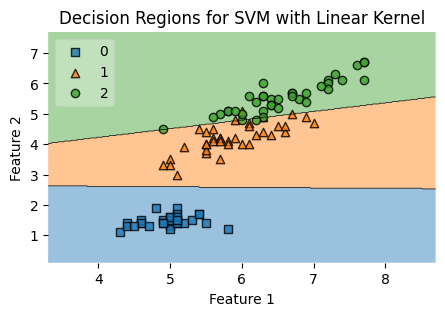

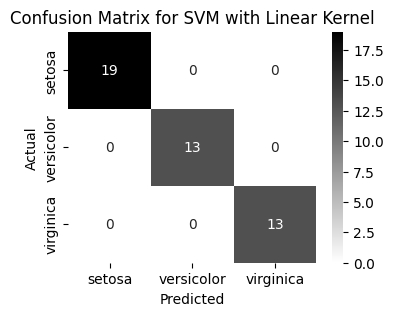

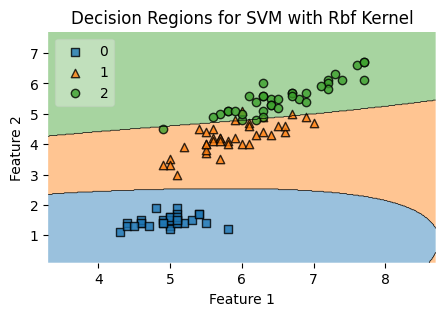

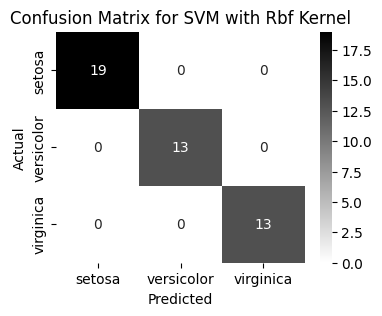

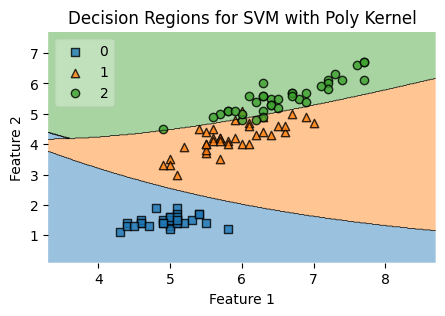

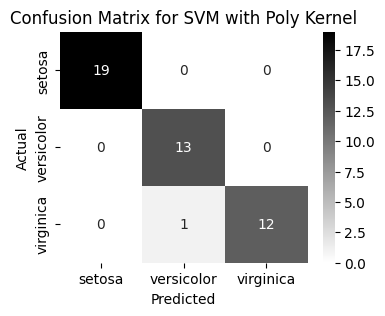

In [ ]:
#Question 1-a
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM classifiers
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    svm_model = SVC(kernel=kernel, degree=3)
    svm_model.fit(X_train, y_train)

    # Plot decision regions
    plt.figure(figsize=(5, 3))
    plot_decision_regions(X_train, y_train, clf=svm_model, legend=2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions for SVM with {kernel.capitalize()} Kernel')
    plt.show()

    # Evaluate performance
    y_pred = svm_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='binary', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix for SVM with {kernel.capitalize()} Kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Kernel: Linear,
Accuracy: 1.0000,
Precision: 1.0000,
Recall: 1.0000


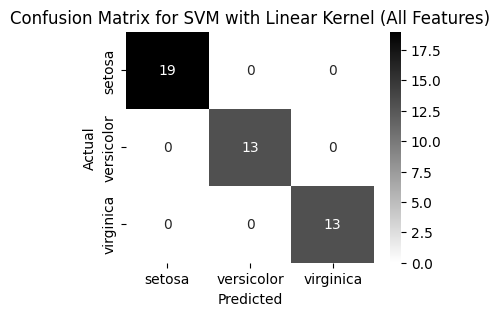

Kernel: Rbf,
Accuracy: 1.0000,
Precision: 1.0000,
Recall: 1.0000


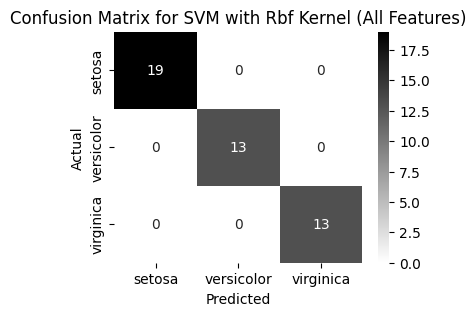

Kernel: Poly,
Accuracy: 0.9778,
Precision: 0.9794,
Recall: 0.9778


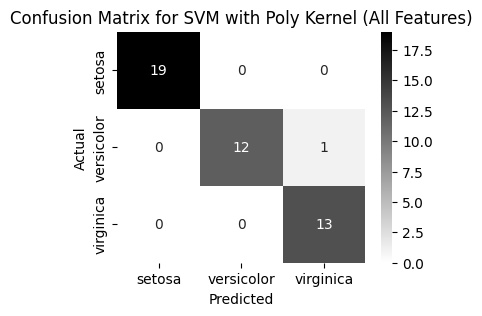

In [ ]:
#Question 1-b

X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM classifiers
for kernel in kernels:
    svm_model = SVC(kernel=kernel, degree=3)
    svm_model.fit(X_train, y_train)

    # Evaluate performance
    y_pred = svm_model.predict(X_test)
    accuracy = svm_model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Kernel: {kernel.capitalize()},\nAccuracy: {accuracy:.4f},\nPrecision: {precision:.4f},\nRecall: {recall:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='binary', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix for SVM with {kernel.capitalize()} Kernel (All Features)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Kernel: linear,
Accuracy: 0.978,
Precision: 0.978,
Recall: 0.978


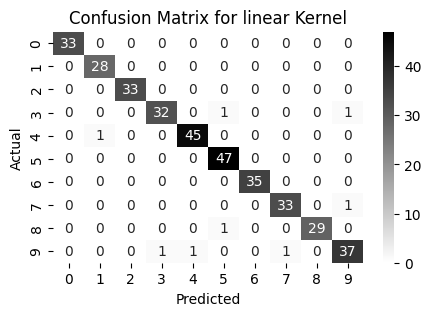

Kernel: rbf,
Accuracy: 0.986,
Precision: 0.986,
Recall: 0.986


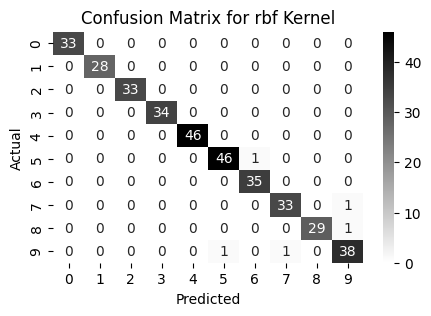

Kernel: poly,
Accuracy: 0.992,
Precision: 0.992,
Recall: 0.992


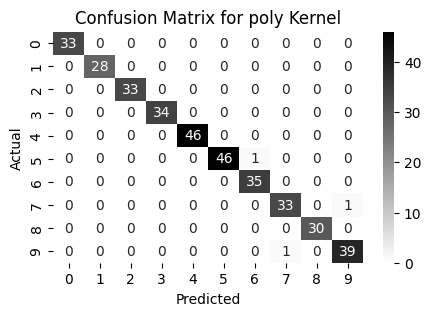

In [ ]:
#Question 2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train SVM models
def train_svm(kernel, C_value=0.8, gamma_value='scale'):
    svm = SVC(kernel=kernel, C=C_value, gamma=gamma_value)
    svm.fit(X_train, y_train)
    return svm

# Train SVM models with different kernels and parameters
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm_model = train_svm(kernel)
    y_pred = svm_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Kernel: {kernel},\nAccuracy: {accuracy:.3f},\nPrecision: {precision:.3f},\nRecall: {recall:.3f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, cmap='binary', fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.title(f"Confusion Matrix for {kernel} Kernel")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: 1,
Hidden Units: (10,),
Accuracy: 0.9667,
Precision: 0.9694,
Recall: 0.9667


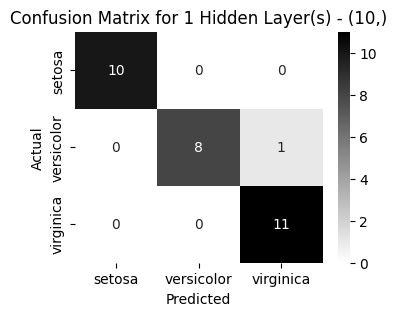

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: 1,
Hidden Units: (30,),
Accuracy: 1.0000,
Precision: 1.0000,
Recall: 1.0000


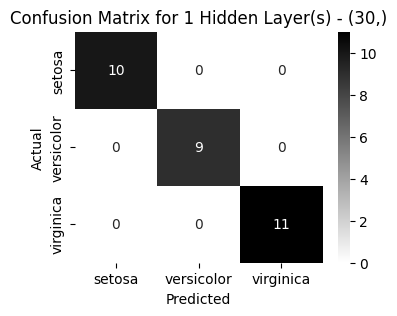

Hidden Layers: 2,
Hidden Units: (10, 10),
Accuracy: 0.9333,
Precision: 0.9333,
Recall: 0.9333


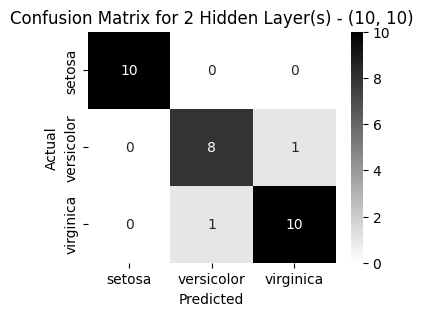

Hidden Layers: 2,
Hidden Units: (20, 10),
Accuracy: 1.0000,
Precision: 1.0000,
Recall: 1.0000


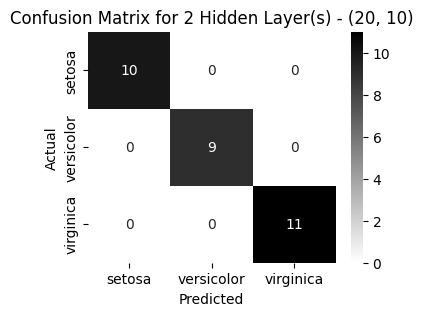

In [ ]:
#Question 3
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the  dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining a function to train MLPClassifier models
def train_nn(hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    return mlp

#Choosing 4 different config
configurations = [(10,), (30,), (10, 10), (20, 10)]

for config in configurations:
    mlp_model = train_nn(config)
    y_pred = mlp_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Hidden Layers: {len(config)},\nHidden Units: {config},\nAccuracy: {accuracy:.4f},\nPrecision: {precision:.4f},\nRecall: {recall:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='binary', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix for {len(config)} Hidden Layer(s) - {config}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
